In [1]:
from sklearn import linear_model, datasets, tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_iris()
X = data.data
y = data.target

In [3]:
number_of_samples = len(y)
# Splitting into training, validation, and test sets
random_indices = np.random.permutation(number_of_samples)

# Training set
num_training_samples = int(number_of_samples * 0.7)
Xtrain = X[random_indices[:num_training_samples]]
ytrain = y[random_indices[:num_training_samples]]

# Validation set
num_validation_samples = int(number_of_samples * 0.15)
Xval = X[random_indices[num_training_samples:num_training_samples + num_validation_samples]]
yval = y[random_indices[num_training_samples:num_training_samples + num_validation_samples]]

# Test set
num_test_samples = int(number_of_samples * 0.15)
Xtest = X[random_indices[-num_test_samples:]]
ytest = y[random_indices[-num_test_samples:]]

In [4]:
dtc = tree.DecisionTreeClassifier(criterion="entropy")
dtc.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

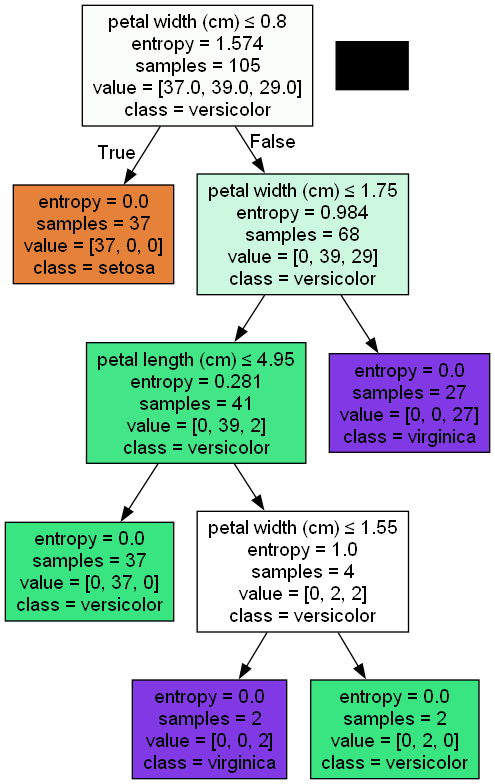

In [8]:
import graphviz
from io import StringIO
import pydotplus
from IPython.display import Image  # Importing Image for display

# Generate the dot data
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data, feature_names=data.feature_names, class_names=data.target_names, filled=True, special_characters=True)

# Convert the dot data to a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the graph as an image
Image(graph.create_png())

In [6]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     -------- ---------------------------- 61.4/278.7 kB 409.6 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/278.7 kB 409.6 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/278.7 kB 383.3 kB/s eta 0:00:01
     -------------- --------------------- 112.6/278.7 kB 385.0 kB/s eta 0:00:01
     -------------- --------------------- 112.6/278.7 kB 385.0 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/278.7 kB 370.8 kB/s eta 0:00:01
     --------------------- -------------- 163.8/278.7 kB 378.3 kB/s eta 0:0

In [9]:
# Evaluation - validation set
val_pred = dtc.predict(Xval)
misclassified_val = sum(val_pred != yval)
print(f"Validation set misclassified = {(misclassified_val * 100) / len(yval)}")
# Evaluation - test set
test_pred = dtc.predict(Xtest)
misclassified_test = sum(test_pred != ytest)
print(f"Test set misclassified = {(misclassified_test * 100) / len(ytest)}")

Validation set misclassified = 9.090909090909092
Test set misclassified = 4.545454545454546


In [10]:
# load dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target
len(y)

178

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.7, random_state=0)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.15, random_state=0)

In [12]:
# make model
dtc = tree.DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)

DecisionTreeClassifier()

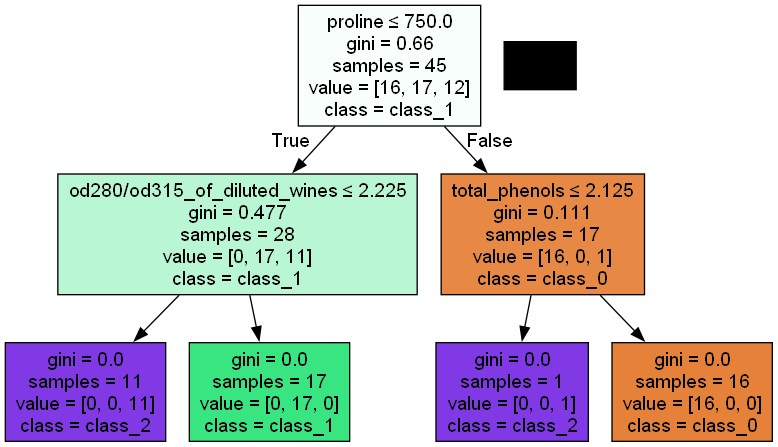

In [13]:
# plot decision tree
import pydotplus
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data, 
                                feature_names=wine.feature_names,  
                                class_names=wine.target_names,
                                filled=True, special_characters=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [14]:
# Evaluation - validation set
val_pred = dtc.predict(Xval)
misclassified_val = sum(val_pred != yval)
print(f"Validation set misclassified = {(misclassified_val * 100) / len(yval)}")
# Evaluation - test set
test_pred = dtc.predict(Xtest)
misclassified_test = sum(test_pred != ytest)
print(f"Test set misclassified = {(misclassified_test * 100) / len(ytest)}")

Validation set misclassified = 25.0
Test set misclassified = 10.4
